#André Lucas Fabbris de Toledo - RA: 1902777

#AC1

1. Quantidade de máquinas por tipo quando existe apenas a falha Power Failure.
2. Quantidade de registros de falhas quando existe apenas o tipo de máquina L.
3. Apresentar apenas falhas do tipo Overstrain Failure e Random Failures.
4. Apresentar a quantidade de falhas quando existe uma faixa de velocidade de rotação da máquina entre 1500 e 2000.
5. Plotar os gráficos da curva de temperatura do processo e velocidade de rotação quando tiver apenas máquinas do tipo L, depois quando tiver máquinas do tipo H e, finalmente, quando tiver máquinas do tipo M.

In [109]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
from pyspark.sql import Row
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [111]:
spark = SparkSession.builder\
.master("local")\
.appName("Colab")\
.config('spark.ui.port', '4050')\
.getOrCreate()


In [112]:
path = "/content/drive/MyDrive/predictive_maintenance.csv"

df_spark = spark.read.csv(path,inferSchema=True,header =True)

#df_spark = spark.read.csv('/content/drive/MyDrive/predictive_maintenance.csv')

In [113]:
df_spark.show(10)

+---+----------+----+-------------------+-----------------------+----------------------+-----------+---------------+------+------------+
|UDI|Product ID|Type|Air temperature [K]|Process temperature [K]|Rotational speed [rpm]|Torque [Nm]|Tool wear [min]|Target|Failure Type|
+---+----------+----+-------------------+-----------------------+----------------------+-----------+---------------+------+------------+
|  1|    M14860|   M|              298.1|                  308.6|                  1551|       42.8|              0|     0|  No Failure|
|  2|    L47181|   L|              298.2|                  308.7|                  1408|       46.3|              3|     0|  No Failure|
|  3|    L47182|   L|              298.1|                  308.5|                  1498|       49.4|              5|     0|  No Failure|
|  4|    L47183|   L|              298.2|                  308.6|                  1433|       39.5|              7|     0|  No Failure|
|  5|    L47184|   L|              298.2|

In [114]:
#Quantidade de máquinas por tipo quando existe apenas a falha Power Failure.

df_fal_filtrado = df_spark.filter((df_spark['Failure Type'] == 'Power Failure'))

df_fal_filtrado.groupBy('Type', 'Failure Type').count().show()

+----+-------------+-----+
|Type| Failure Type|count|
+----+-------------+-----+
|   H|Power Failure|    5|
|   L|Power Failure|   59|
|   M|Power Failure|   31|
+----+-------------+-----+



In [115]:
# Quantidade de registros de falhas quando existe apenas o tipo de máquina L.

df_fal_filtrado = df_spark.filter((df_spark['Type'] == 'L'))

df_fal_filtrado.groupBy('Type').count().show()



+----+-----+
|Type|count|
+----+-----+
|   L| 6000|
+----+-----+



In [116]:
# Apresentar apenas falhas do tipo Overstrain Failure e Random Failures.

df_fal_tipos_filtrados = df_spark.filter((df_spark['Failure Type'] == 'Overstrain Failure') | (df_spark['Failure Type'] == 'Random Failures'))


df_fal_tipos_filtrados.show()

+----+----------+----+-------------------+-----------------------+----------------------+-----------+---------------+------+------------------+
| UDI|Product ID|Type|Air temperature [K]|Process temperature [K]|Rotational speed [rpm]|Torque [Nm]|Tool wear [min]|Target|      Failure Type|
+----+----------+----+-------------------+-----------------------+----------------------+-----------+---------------+------+------------------+
| 161|    L47340|   L|              298.4|                  308.2|                  1282|       60.7|            216|     1|Overstrain Failure|
| 162|    L47341|   L|              298.3|                  308.1|                  1412|       52.3|            218|     1|Overstrain Failure|
| 243|    L47422|   L|              298.0|                  308.2|                  1348|       58.8|            202|     1|Overstrain Failure|
| 249|    L47428|   L|              298.0|                  308.3|                  1362|       56.8|            216|     1|Overstrain F

In [117]:
# Apresentar a quantidade de falhas quando existe uma faixa de velocidade de rotação da máquina entre 1500 e 2000.

df_vel_filtrado = df_spark.filter((df_spark['Rotational speed [rpm]'] >= '1500') & (df_spark['Rotational speed [rpm]'] <= 2000))

df_vel_filtrado.show()

+---+----------+----+-------------------+-----------------------+----------------------+-----------+---------------+------+------------+
|UDI|Product ID|Type|Air temperature [K]|Process temperature [K]|Rotational speed [rpm]|Torque [Nm]|Tool wear [min]|Target|Failure Type|
+---+----------+----+-------------------+-----------------------+----------------------+-----------+---------------+------+------------+
|  1|    M14860|   M|              298.1|                  308.6|                  1551|       42.8|              0|     0|  No Failure|
|  7|    L47186|   L|              298.1|                  308.6|                  1558|       42.4|             14|     0|  No Failure|
|  8|    L47187|   L|              298.1|                  308.6|                  1527|       40.2|             16|     0|  No Failure|
|  9|    M14868|   M|              298.3|                  308.7|                  1667|       28.6|             18|     0|  No Failure|
| 10|    M14869|   M|              298.5|

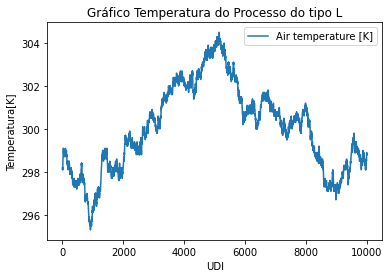

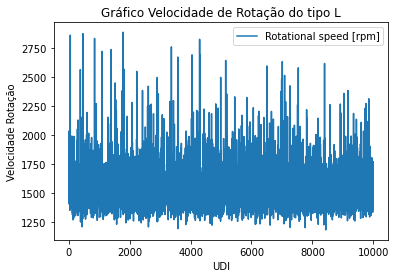

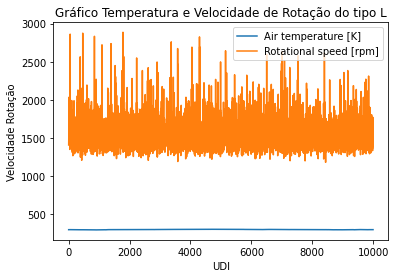

In [123]:
# Plotar os gráficos da curva de temperatura do processo e velocidade de rotação quando tiver apenas máquinas do tipo L, 
# depois quando tiver máquinas do tipo H e, finalmente, quando tiver máquinas do tipo M.

#Curva de Temperatura e Velocidade de Rotação para máquinas do tipo L

df_fal_filtradoL = df_spark.filter((df_spark['Type'] == 'L'))


df_fal_filtradoL.toPandas().plot(x = 'UDI', y = 'Air temperature [K]')
plt.title("Gráfico Temperatura do Processo do tipo L")
plt.ylabel("Temperatura[K]")
plt.show()

df_fal_filtradoL.toPandas().plot(x = 'UDI', y = 'Rotational speed [rpm]')
plt.title("Gráfico Velocidade de Rotação do tipo L")
plt.ylabel("Velocidade Rotação")
plt.show()

#Grafico das curvas de Temperatura e Velocidade de Rotação
df_fal_filtradoL.toPandas().plot(x = 'UDI', y = ['Air temperature [K]','Rotational speed [rpm]'])
plt.title("Gráfico Temperatura e Velocidade de Rotação do tipo L")
plt.ylabel("Velocidade Rotação")
plt.show()

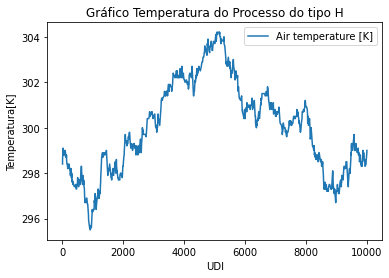

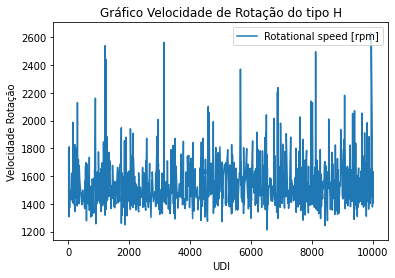

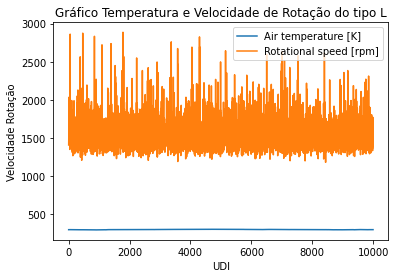

In [125]:
#Curva de Temperatura e Velocidade de Rotação para máquinas do tipo H

df_fal_filtradoH = df_spark.filter((df_spark['Type'] == 'H'))


df_fal_filtradoH.toPandas().plot(x = 'UDI', y = 'Air temperature [K]')
plt.title("Gráfico Temperatura do Processo do tipo H")
plt.ylabel("Temperatura[K]")
plt.show()

df_fal_filtradoH.toPandas().plot(x = 'UDI', y = 'Rotational speed [rpm]')
plt.title("Gráfico Velocidade de Rotação do tipo H")
plt.ylabel("Velocidade Rotação")
plt.show()

#Grafico das curvas de Temperatura e Velocidade de Rotação
df_fal_filtradoL.toPandas().plot(x = 'UDI', y = ['Air temperature [K]','Rotational speed [rpm]'])
plt.title("Gráfico Temperatura e Velocidade de Rotação do tipo L")
plt.ylabel("Velocidade Rotação")
plt.show()

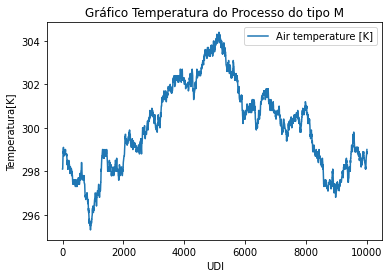

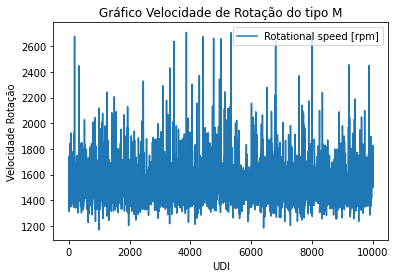

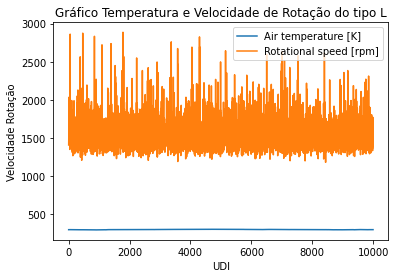

In [128]:
#Curva de Temperatura e Velocidade de Rotação para máquinas do tipo M

df_fal_filtradoM = df_spark.filter((df_spark['Type'] == 'M'))


df_fal_filtradoM.toPandas().plot(x = 'UDI', y = 'Air temperature [K]')
plt.title("Gráfico Temperatura do Processo do tipo M")
plt.ylabel("Temperatura[K]")
plt.show()

df_fal_filtradoM.toPandas().plot(x = 'UDI', y = 'Rotational speed [rpm]')
plt.title("Gráfico Velocidade de Rotação do tipo M")
plt.ylabel("Velocidade Rotação")
plt.show()

#Grafico das curvas de Temperatura e Velocidade de Rotação
df_fal_filtradoL.toPandas().plot(x = 'UDI', y = ['Air temperature [K]','Rotational speed [rpm]'])
plt.title("Gráfico Temperatura e Velocidade de Rotação do tipo L")
plt.ylabel("Velocidade Rotação")
plt.show()